In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from HMM import *

In [337]:
T = np.array([[0.24 ,0.30,0.46],[0.31,0.29,0.4],[0.45,0.35,0.3]])  # each row gives transition probability for a state
E = np.array([[0.37,0.33,0.30],[0.39,0.30,0.31],[0.28,0.32,0.40]])  # each row gives emission probability for a state
W = np.array(['W1','W2','W3'])
V = np.array(['V1','V2','V3'])

print('Transition probabiity')
print(T)
print()
print('Emission probabiity')
print(E)

Transition probabiity
[[0.24 0.3  0.46]
 [0.31 0.29 0.4 ]
 [0.45 0.35 0.3 ]]

Emission probabiity
[[0.37 0.33 0.3 ]
 [0.39 0.3  0.31]
 [0.28 0.32 0.4 ]]


# Decoding

Given the sequence, we want to know the sequence of hidden states

In [344]:
#seq = np.random.randint(3,size=(1,12))
seq = np.array('0 1 2 2 2 2 2 1 1 2 1 2 1 2 0 0 0 1 2 1 2'.split())
seq = seq.reshape(1,len(seq))

initial_proba = np.array([0.24,0.36,0.4])

print('Given emitted sequence :',seq)

ex2 = HMM(T,E,W,V)
vitmat =ex2.vitterbi_algorithm_matrix(seq,initial_proba)

Given emitted sequence : [['0' '1' '2' '2' '2' '2' '2' '1' '1' '2' '1' '2' '1' '2' '0' '0' '0' '1'
  '2' '1' '2']]


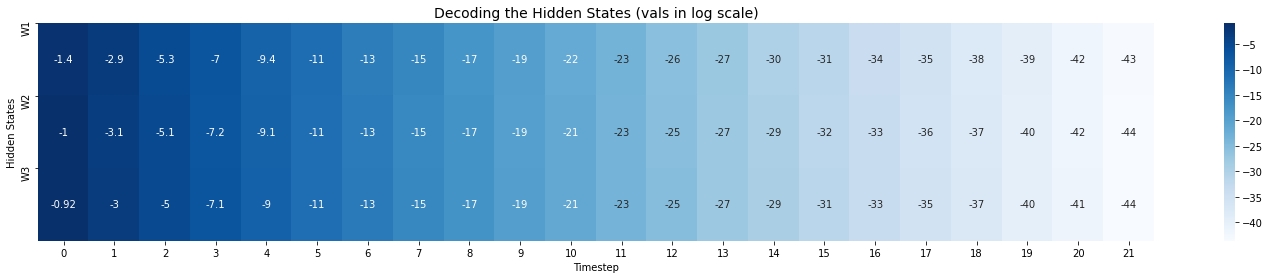

In [354]:
plt.figure(figsize=(25,4))
sns.heatmap(np.log(vitmat),cmap='Blues',annot=True)
plt.xlabel('Timestep')
plt.yticks([0,1,2],['W1','W2','W3'])
plt.ylabel('Hidden States')
plt.title('Decoding the Hidden States (vals in log scale)',fontsize=14)
plt.show()

In [349]:
output = ex1.decode_sequence(seq,initial_proba)
hidden_states , traceback_mat = output['Hidden_states'] , output['Traceback']

traceback_mat

array([[0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0.]])

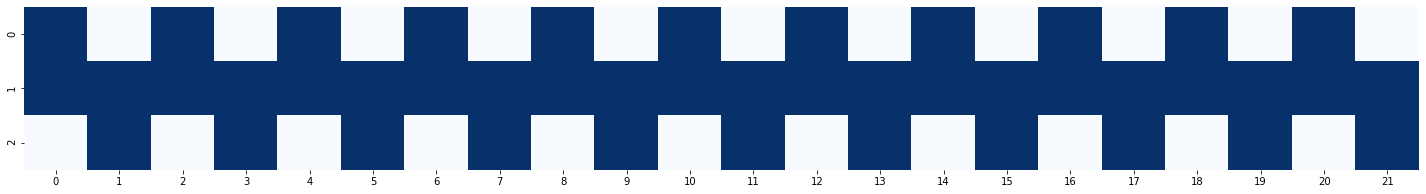

In [350]:
plt.figure(figsize=(25,3))
sns.heatmap(traceback_mat,cmap='Blues_r',cbar=False)
plt.show()

In [353]:
print('Hidden state sequence: \n', hidden_states)

Hidden state sequence: 
 ['W2' 'W0' 'W2' 'W0' 'W2' 'W0' 'W2' 'W0' 'W2' 'W0' 'W2' 'W0' 'W2' 'W0'
 'W2' 'W0' 'W2' 'W0' 'W2' 'W0' 'W2' 'W0']
